In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/CharishYadavali/MTH-PROBLEM-1A/refs/heads/main/Police%20Shootings%20Age%20Race.csv')
df


,age,race
0,8,B
1,13,B
2,14,B
3,15,B
4,15,B
...,...,...
6049,84,W
6050,88,W
6051,88,W
6052,91,W


In [2]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate and display statistics for Black people
black_ages = df[df['race'] == 'B']['age']
print("Statistics for Black People:")
print(f"Minimum Age: {black_ages.min()}")
print(f"Maximum Age: {black_ages.max()}")
print(f"Median Age: {black_ages.median()}")
print(f"Mean Age: {black_ages.mean()}")
print(f"Skewness of Age: {skew(black_ages)}")
print(f"Kurtosis of Age: {kurtosis(black_ages)}")


Statistics for Black People:
Minimum Age: 8
Maximum Age: 88
Median Age: 31.0
Mean Age: 33.04860442733398
Skewness of Age: 0.9471771630506532
Kurtosis of Age: 0.8262343866756972


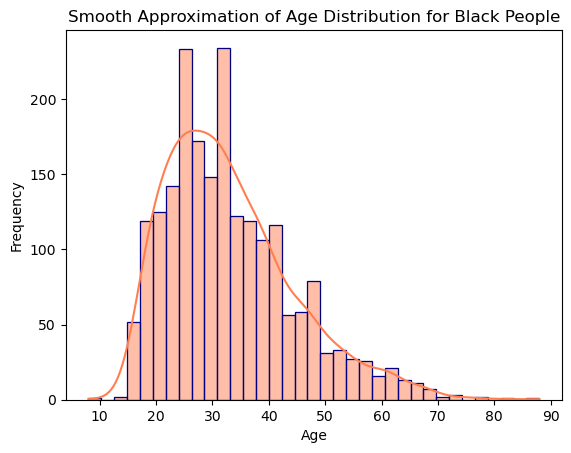

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for Black people
sns.histplot(black_ages, kde=True, color='coral', edgecolor='navy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Smooth Approximation of Age Distribution for Black People')
plt.show()


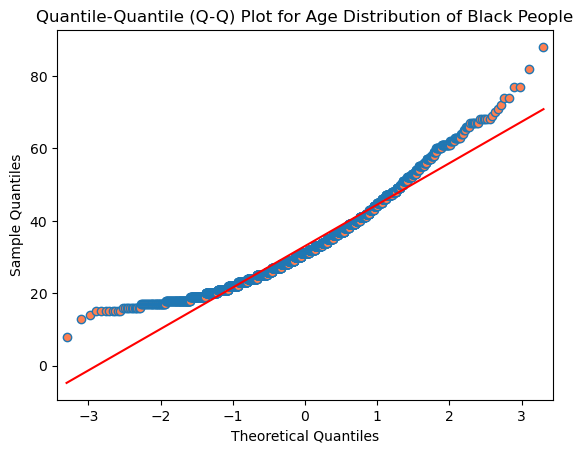

In [4]:
import statsmodels.api as sm

# Q-Q Plot for Black people
sm.qqplot(black_ages, line='s', markerfacecolor='coral')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile-Quantile (Q-Q) Plot for Age Distribution of Black People')
plt.show()

In [5]:
# Calculate and display statistics for White people
white_ages = df[df['race'] == 'W']['age']
print("\nStatistics for White People:")
print(f"Minimum Age: {white_ages.min()}")
print(f"Maximum Age: {white_ages.max()}")
print(f"Median Age: {white_ages.median()}")
print(f"Mean Age: {white_ages.mean()}")
print(f"Skewness of Age: {skew(white_ages)}")
print(f"Kurtosis of Age: {kurtosis(white_ages)}")



Statistics for White People:
Minimum Age: 2
Maximum Age: 91
Median Age: 38.0
Mean Age: 40.270875251509054
Skewness of Age: 0.5420546838752048
Kurtosis of Age: -0.05525599125498548


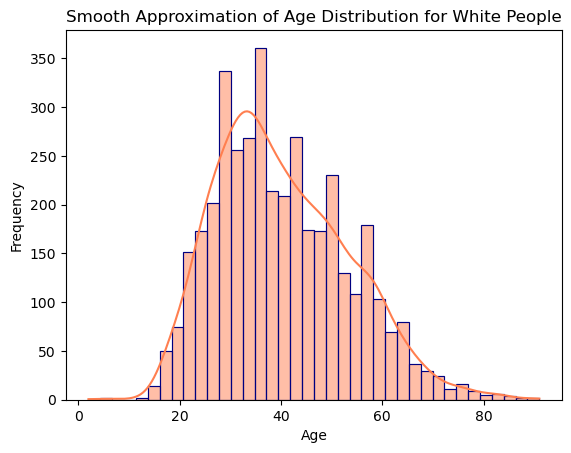

In [6]:
# Plot KDE for White people
sns.histplot(white_ages, kde=True, color='coral', edgecolor='navy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Smooth Approximation of Age Distribution for White People')
plt.show()


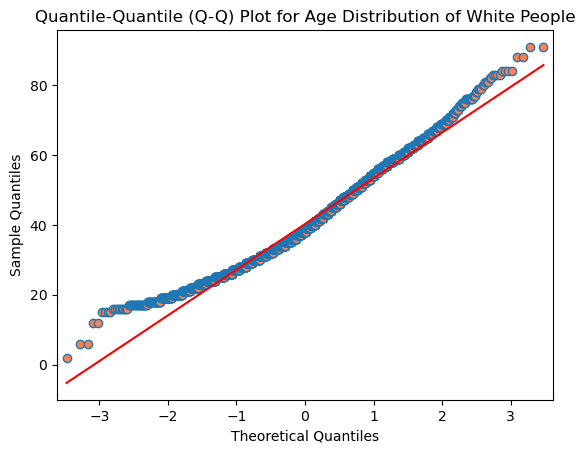

In [7]:
# Q-Q Plot for White people
sm.qqplot(white_ages, line='s', markerfacecolor='coral')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile-Quantile (Q-Q) Plot for Age Distribution of White People')
plt.show()


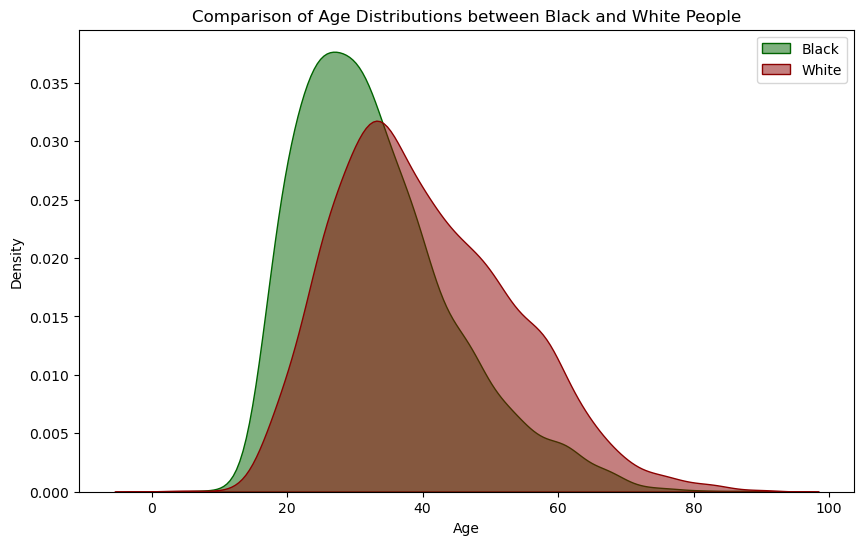

In [8]:
#plot for Comparison of Age Distributions between Black and White People
def plot_age_distribution(df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    colors = {'B': 'darkgreen', 'W': 'darkred'}
    labels = {'B': 'Black', 'W': 'White'}
    
    plt.figure(figsize=(10, 6))
    for race in ['B', 'W']:
        subset = df[df['race'] == race]
        sns.kdeplot(subset['age'], label=labels[race], color=colors[race], fill=True, alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.title('Comparison of Age Distributions between Black and White People')
    plt.legend()
    plt.show()

plot_age_distribution(df)


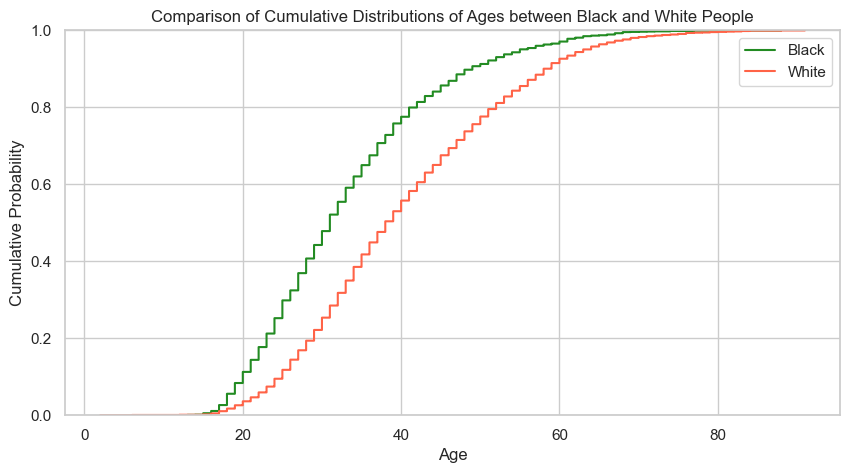

In [9]:
#plot for Comparison of Cumulative Distributions of Ages between Black and White People
def plot_cumulative_distribution(df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    colors = {'B': 'forestgreen', 'W': 'tomato'}
    labels = {'B': 'Black', 'W': 'White'}
    
    plt.figure(figsize=(10, 5))
    sns.set(style="whitegrid")
    for race, color in colors.items():
        subset = df[df['race'] == race]
        sns.ecdfplot(data=subset, x='age', label=labels[race], color=color)
    plt.xlabel('Age')
    plt.ylabel('Cumulative Probability')
    plt.title('Comparison of Cumulative Distributions of Ages between Black and White People')
    plt.legend()
    plt.show()

plot_cumulative_distribution(df)


In [10]:
#Statistical Functions
def calculate_statistics(df, race):
    """Calculate mean, standard deviation, and sample size for a specified race."""
    subset = df[df['race'] == race]
    return {
        'mean': subset['age'].mean(),
        'std_dev': subset['age'].std(),
        'count': len(subset)
    }

def cohen_d(mean1, mean2, std1, std2, n1, n2):
    """Compute Cohen's d to assess the effect size between two groups."""
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    return (mean2 - mean1) / pooled_std


In [11]:
#Calculate Statistics and Cohen's d
# Obtain statistics for both groups
black_stats = calculate_statistics(df, 'B')
white_stats = calculate_statistics(df, 'W')

# Compute Cohen's d
effect_size = cohen_d(
    mean1=black_stats['mean'], mean2=white_stats['mean'],
    std1=black_stats['std_dev'], std2=white_stats['std_dev'],
    n1=black_stats['count'], n2=white_stats['count']
)

# Output the result
print(f"Cohen's d: {effect_size}")


Cohen's d: 0.5754223321506542


In [12]:
# Performing the t-test
from scipy.stats import ttest_ind

# Performing the t-test
t_statistic, p_value = ttest_ind(black_ages, white_ages, equal_var=False)

# Display the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The mean age difference is statistically significant.")
else:
    print("The mean age difference is not statistically significant.")


T-Statistic: -22.167088968650308
P-Value: 1.1450337917863026e-103
The mean age difference is statistically significant.


In [13]:
import numpy as np

def permutation_test(black_data, white_data, num_permutations=5000):
    # Calculate the observed test statistic
    observed_statistic = np.mean(white_data) - np.mean(black_data)

    # Combine and shuffle the data
    combined_data = np.concatenate((black_data, white_data))
    perm_test_statistics = np.empty(num_permutations)

    for i in range(num_permutations):
        np.random.shuffle(combined_data)
        perm_black_data = combined_data[:len(black_data)]
        perm_white_data = combined_data[len(black_data):]
        
        # Store the test statistic for the permuted data
        perm_test_statistics[i] = np.mean(perm_white_data) - np.mean(perm_black_data)

    # Calculate p-value
    p_value = np.mean(np.abs(perm_test_statistics) >= np.abs(observed_statistic))

    return observed_statistic, p_value

# Extracting age data for black and white people
black_age_data = df[df['race'] == 'B']['age'].to_numpy()
white_age_data = df[df['race'] == 'W']['age'].to_numpy()

# Run the permutation test
observed_statistic, p_value = permutation_test(black_age_data, white_age_data)

# Print the result
print(f"Observed Statistic: {observed_statistic}")
print(f"P-value: {p_value}")



Observed Statistic: 7.222270824175077
P-value: 0.0
